# CSC 578
---



---



In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
df = pd.read_csv("Metro_Interstate_reduced.csv")
date_time = pd.to_datetime(df.pop('date_time'), format='%Y.%m.%d %H:%M:%S')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


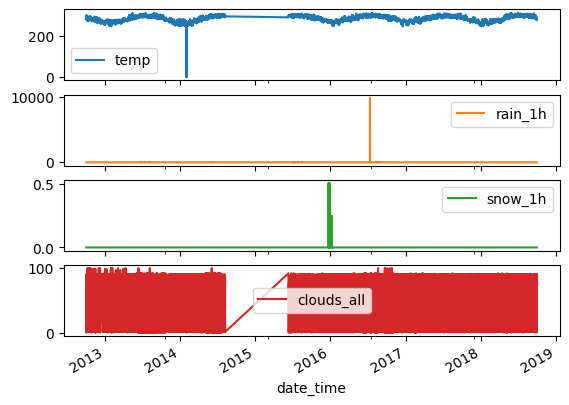

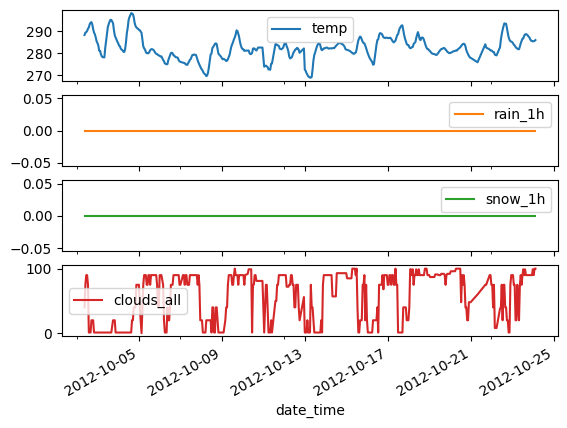

In [ ]:
#from TF tutorial
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,40575.0,281.316763,13.816618,0.0,271.84,282.86,292.28,310.07
rain_1h,40575.0,0.318632,48.812640,0.0,0.00,0.00,0.00,9831.30
snow_1h,40575.0,0.000117,0.005676,0.0,0.00,0.00,0.00,0.51
clouds_all,40575.0,44.199162,38.683447,0.0,1.00,40.00,90.00,100.00
traffic_volume,40575.0,3290.650474,1984.772909,0.0,1248.50,3427.00,4952.00,7280.00


# Exploratory Data Analysis

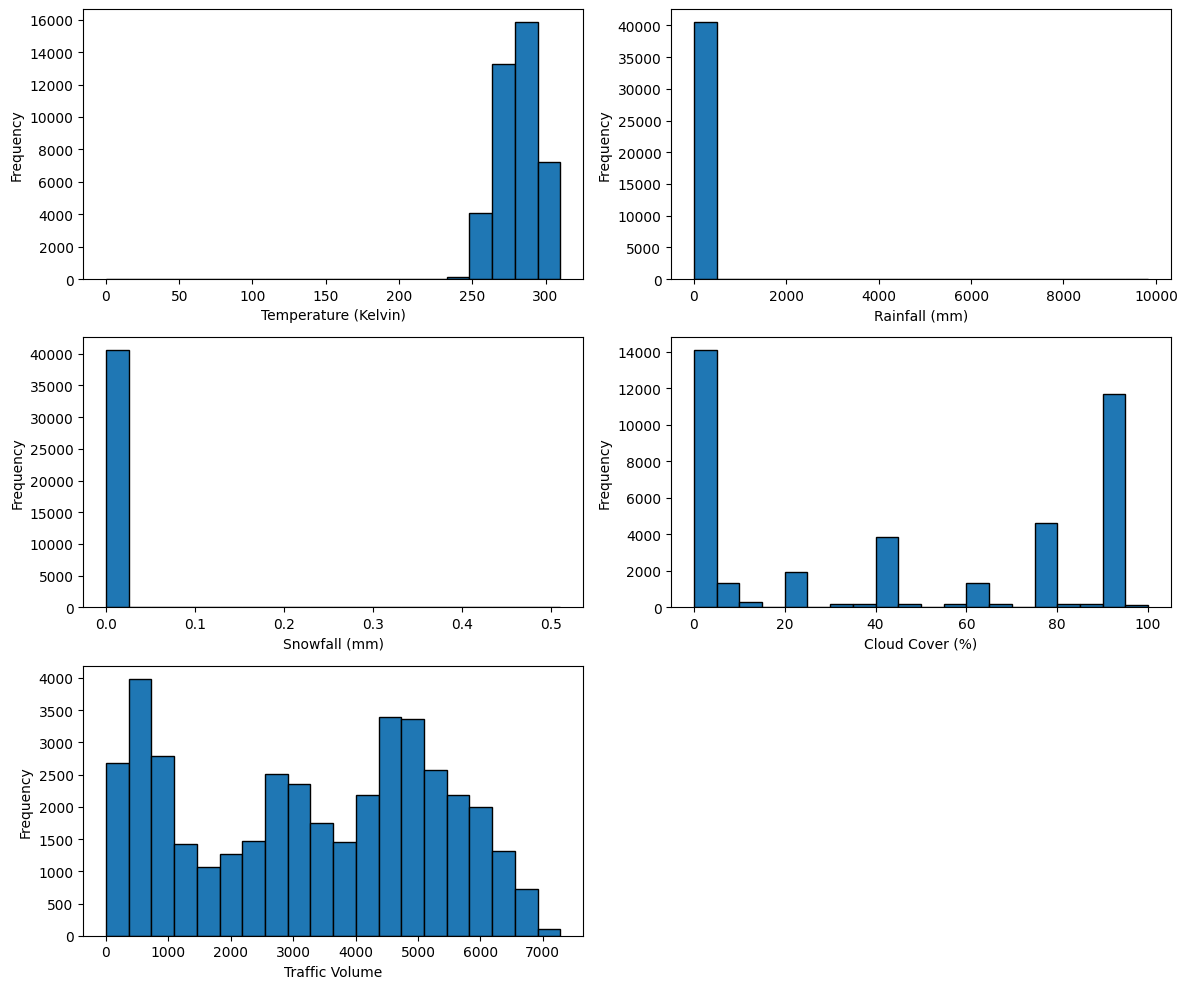

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.hist(df['temp'], bins=20, edgecolor='black')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
plt.hist(df['rain_1h'], bins=20, edgecolor='black')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
plt.hist(df['snow_1h'], bins=20, edgecolor='black')
plt.xlabel('Snowfall (mm)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
plt.hist(df['clouds_all'], bins=20, edgecolor='black')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
plt.hist(df['traffic_volume'], bins=20, edgecolor='black')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


From the histograms, we can observe the following:

* Temperature (temp): The distribution appears to be approximately normal, with a peak around a certain temperature range.
* Rainfall (rain_1h) and Snowfall (snow_1h): Most values are concentrated near zero, indicating that the majority of observations have low or no rainfall/snowfall.
* Cloud Cover (clouds_all): The distribution is skewed to the right, with a higher frequency of observations having lower cloud cover percentages.
* Traffic Volume (traffic_volume): The distribution is skewed to the left, indicating that lower traffic volumes are more common.

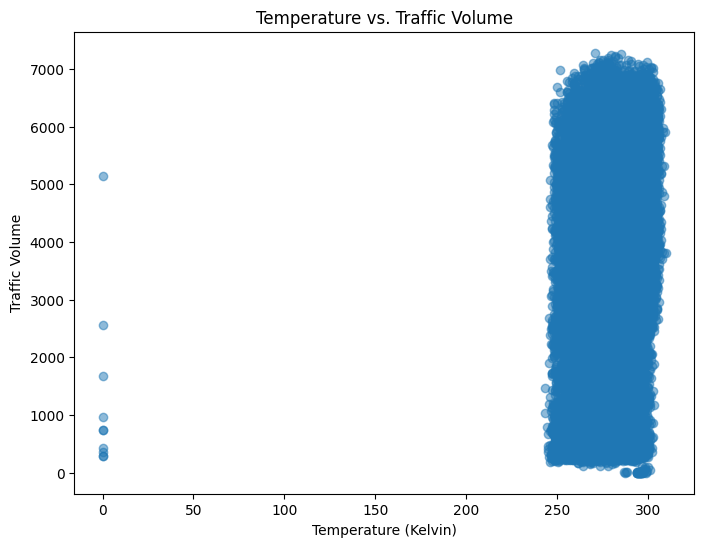

In [ ]:
# Scatter plot: Temperature vs. Traffic Volume
plt.figure(figsize=(8, 6))
plt.scatter(df['temp'], df['traffic_volume'], alpha=0.5)
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Traffic Volume')
plt.title('Temperature vs. Traffic Volume')
plt.show()

The scatterplot between temperature and traffic_volume is a Jittered scatterplot. The datapoints are clustered together making it difficult to understand the pattern.  

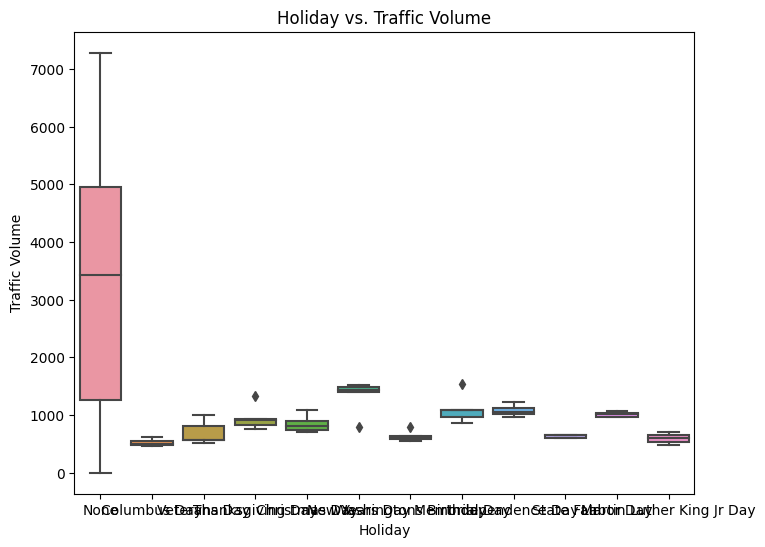

In [ ]:
# Box plot: Holiday vs. Traffic Volume
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='holiday', y='traffic_volume')
plt.xlabel('Holiday')
plt.ylabel('Traffic Volume')
plt.title('Holiday vs. Traffic Volume')
plt.show()

The boxplot between Holiday and traffic_volume. There are some outliers for some holidays.

<ipython-input-8-24c6cae51aba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


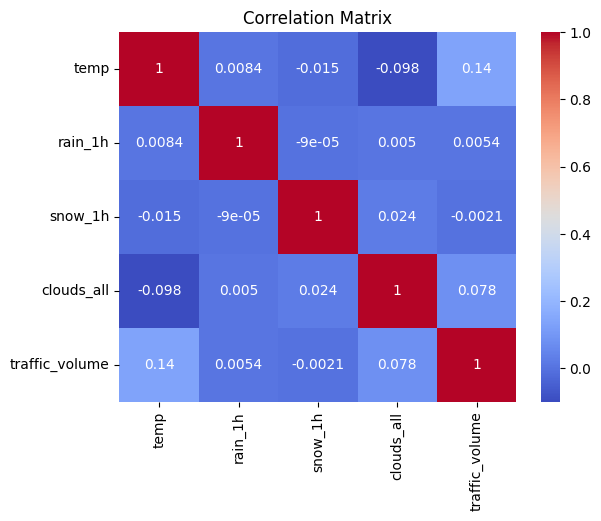

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There is a high positive correlation bewteen temperature and traffic_volume of 0.14.

#Below code is #from TF tutorial


In [ ]:
#converting date_time:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [ ]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

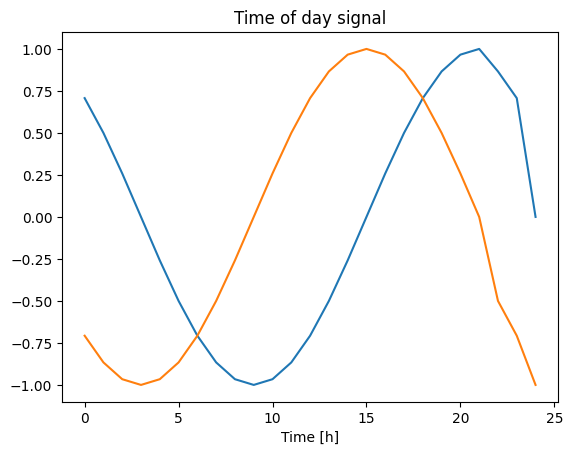

In [ ]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

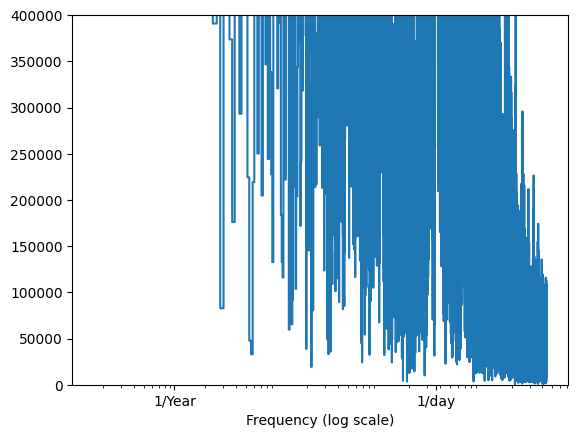

In [ ]:
fft = tf.signal.rfft(df['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['traffic_volume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

# Split the Data

In [ ]:

# Define the index range for training and test sets
train_start_index = 0
train_end_index = 35574
test_start_index = 35575
test_end_index = 40574


# Split the data into training and test sets
train_data = df.iloc[train_start_index:train_end_index + 1]
test_data = df.iloc[test_start_index:test_end_index + 1]



# Get the target feature (traffic_volume)
train_target = train_data['traffic_volume'].values.reshape(-1, 1)
test_target = test_data['traffic_volume'].values.reshape(-1, 1)
num_features = df.shape[1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the target feature separately
scaler = MinMaxScaler()
train_target_norm = scaler.fit_transform(train_target)
test_target_norm = scaler.transform(test_target)


In [ ]:
# Normalize the input features
input_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
scaler = MinMaxScaler()
train_data[input_features] = scaler.fit_transform(train_data[input_features])
test_data[input_features] = scaler.transform(test_data[input_features])

<ipython-input-15-8cbc479f2edb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[input_features] = scaler.fit_transform(train_data[input_features])
<ipython-input-15-8cbc479f2edb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[input_features] = scaler.transform(test_data[input_features])


In [ ]:
train_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Day sin,Day cos,Year sin,Year cos
0,None,0.935245,0.0,0.0,0.40,Clouds,scattered clouds,5545,7.071068e-01,-7.071068e-01,-0.999766,0.021642
1,None,0.938749,0.0,0.0,0.75,Clouds,broken clouds,4516,5.000000e-01,-8.660254e-01,-0.999750,0.022358
2,None,0.939463,0.0,0.0,0.90,Clouds,overcast clouds,4767,2.588190e-01,-9.659258e-01,-0.999734,0.023075
3,None,0.941247,0.0,0.0,0.90,Clouds,overcast clouds,5026,1.143105e-11,-1.000000e+00,-0.999717,0.023791
4,None,0.944524,0.0,0.0,0.75,Clouds,broken clouds,4918,-2.588190e-01,-9.659258e-01,-0.999700,0.024508
...,...,...,...,...,...,...,...,...,...,...,...,...
35570,None,0.882202,0.0,0.0,0.90,Snow,heavy snow,1389,-1.000000e+00,-1.206420e-12,0.892506,0.451036
35571,None,0.881294,0.0,0.0,0.90,Snow,heavy snow,1117,-9.659258e-01,2.588190e-01,0.892829,0.450397
35572,None,0.880093,0.0,0.0,0.90,Snow,snow,844,-8.660254e-01,5.000000e-01,0.893151,0.449757
35573,None,0.879672,0.0,0.0,0.90,Snow,snow,753,-7.071068e-01,7.071068e-01,0.893473,0.449116


In [ ]:
test_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Day sin,Day cos,Year sin,Year cos
35575,None,0.880353,0.0,0.0,0.90,Snow,light snow,599,-2.588190e-01,0.965926,0.894116,0.447835
35576,None,0.880580,0.0,0.0,0.90,Snow,light snow,308,-3.769765e-12,1.000000,0.894437,0.447194
35577,None,0.880580,0.0,0.0,0.90,Snow,light snow,242,2.588190e-01,0.965926,0.894757,0.446553
35578,None,0.880353,0.0,0.0,0.90,Snow,light snow,231,5.000000e-01,0.866025,0.895077,0.445911
35579,None,0.880093,0.0,0.0,0.90,Snow,light snow,335,7.071068e-01,0.707107,0.895397,0.445270
...,...,...,...,...,...,...,...,...,...,...,...,...
40570,None,0.919576,0.0,0.0,0.75,Clouds,broken clouds,3543,-9.659258e-01,0.258819,-0.999910,-0.013421
40571,None,0.917337,0.0,0.0,0.90,Clouds,overcast clouds,2781,-8.660254e-01,0.500000,-0.999919,-0.012705
40572,None,0.917240,0.0,0.0,0.90,Thunderstorm,proximity thunderstorm,2159,-7.071068e-01,0.707107,-0.999928,-0.011988
40573,None,0.915164,0.0,0.0,0.90,Clouds,overcast clouds,1450,-5.000000e-01,0.866025,-0.999936,-0.011271


In [ ]:
# Print the shapes of the resulting datasets
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (35575, 12)
Test set shape: (5000, 12)


In [ ]:
#From TF tutorial
train_mean = train_data.mean()
train_std = train_data.std()

train_df = (train_data - train_mean) / train_std
test_df = (test_data - train_mean) / train_std

<ipython-input-19-a641bf1a20f8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_mean = train_data.mean()
<ipython-input-19-a641bf1a20f8>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_std = train_data.std()


# Data Windowing

In [ ]:

class WindowGenerator():
    def __init__(self, input_width, label_width, offset, train_df, test_df, label_columns=None):
        self.input_width = input_width
        self.label_width = label_width
        self.offset = offset
        self.train_df = train_df
        self.test_df = test_df
        self.label_columns = label_columns

        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
            self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.total_window_size = input_width + offset + label_width

    def split_window(self, features):
        inputs = features[:, :self.input_width, :]
        labels = features[:, self.input_width+self.offset:, :]

        if self.label_columns is not None:
            labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=32,
        )

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)


# Define the input width, label width, and offset
input_width = 12
label_width = 1
offset = 3

# Create the WindowGenerator instance
window_generator = WindowGenerator(
    input_width=input_width,
    label_width=label_width,
    offset=offset,
    train_df=train_data[['traffic_volume']],
    test_df=test_data[['traffic_volume']],
    label_columns=['traffic_volume']
)

# Create windowed datasets
train_window = window_generator.train
test_window = window_generator.test

# Print the shapes of the windowed datasets
for inputs, labels in train_window:
    print("Windowed Training Set - Inputs shape:", inputs.shape)
    print("Windowed Training Set - Labels shape:", labels.shape)
    break  # Print only the first batch

for inputs, labels in test_window:
    print("Windowed Test Set - Inputs shape:", inputs.shape)
    print("Windowed Test Set - Labels shape:", labels.shape)
    break  # Print only the first batch



Windowed Training Set - Inputs shape: (32, 12, 1)
Windowed Training Set - Labels shape: (32, 1, 1)
Windowed Test Set - Inputs shape: (32, 12, 1)
Windowed Test Set - Labels shape: (32, 1, 1)


# Tried another method:

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df,  test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=12, label_width=1, shift=3,
                     label_columns=['traffic_volume'])
w1

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [14]
Label column name(s): ['traffic_volume']

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 15, 12)
Inputs shape: (3, 12, 12)
Labels shape: (3, 1, 1)


In [ ]:
w1.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

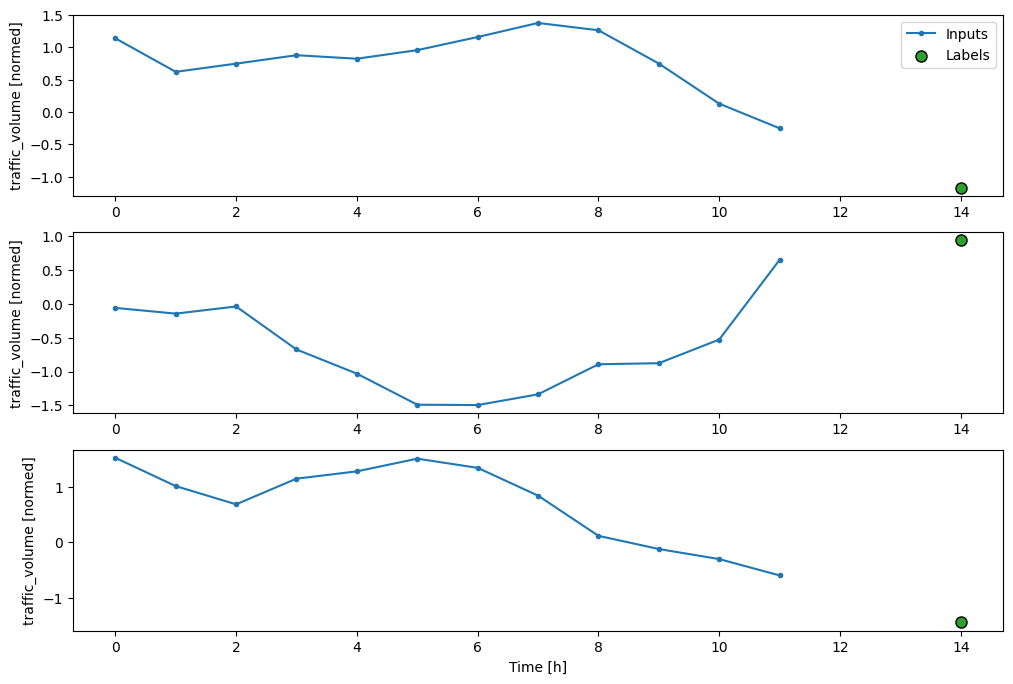

In [ ]:
w1.plot()

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair.
w1.train.element_spec

(TensorSpec(shape=(None, 12, 12), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 12, 12)
Labels shape (batch, time, features): (32, 1, 1)


#Single step models

In [ ]:
single_step_window = WindowGenerator(
    input_width=12, label_width=1, shift=3,
    label_columns=['traffic_volume'])
single_step_window

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [14]
Label column name(s): ['traffic_volume']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 12, 12)
Labels shape (batch, time, features): (32, 1, 1)


#BaseLine

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

baseline = Baseline(label_index=column_indices['traffic_volume'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

performance = {}
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [ ]:
wide_window = WindowGenerator(
    input_width=12, label_width=1, shift=3,
    label_columns=['traffic_volume'])

wide_window

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [14]
Label column name(s): ['traffic_volume']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 12, 12)
Output shape: (32, 12, 1)


ValueError: ignored

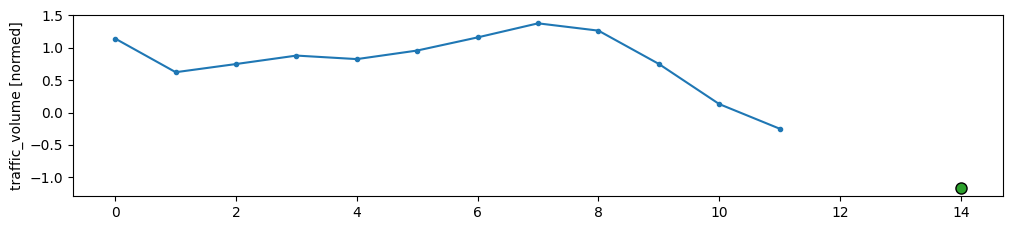

In [ ]:
wide_window.plot(baseline)

#linear model

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 12, 12)
Output shape: (32, 12, 1)


In [ ]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      train_df=train,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

TypeError: ignored

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

TypeError: ignored

# RNN/LSTM

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
# Compile the model
batch_size = 64
num_units = 128
# Add additional LSTM layers
lstm_model.add(layers.LSTM(num_units, return_sequences=True))
lstm_model.add(layers.LSTM(num_units, return_sequences=True))

# Add dropout between the LSTM layers
dropout_rate = 0.2
lstm_model.add(layers.LSTM(num_units, return_sequences=True, dropout=dropout_rate))

lstm_model.compile(loss='mae', optimizer='adam')

In [ ]:
# Train the model
history = lstm_model.fit(train_window, epochs=10)

Epoch 1/10
1112/1112 [==============================] - 18s 14ms/step - loss: 3273.0237
Epoch 2/10
1112/1112 [==============================] - 15s 13ms/step - loss: 3257.2507
Epoch 3/10
1112/1112 [==============================] - 13s 11ms/step - loss: 3235.5146
Epoch 4/10
1112/1112 [==============================] - 13s 11ms/step - loss: 3213.7700
Epoch 5/10
1112/1112 [==============================] - 13s 12ms/step - loss: 3193.1162
Epoch 6/10
1112/1112 [==============================] - 12s 11ms/step - loss: 3169.6213
Epoch 7/10
1112/1112 [==============================] - 12s 11ms/step - loss: 3144.5505
Epoch 8/10
1112/1112 [==============================] - 12s 11ms/step - loss: 3118.2312
Epoch 9/10
1112/1112 [==============================] - 12s 11ms/step - loss: 3091.0020
Epoch 10/10
1112/1112 [==============================] - 13s 12ms/step - loss: 3063.7593


In [ ]:
#evaluate baselime model
lstm_model.evaluate(test_df)

156/156 [==============================] - 2s 5ms/step - loss: 0.1022


0.10224371403455734

In [ ]:
# Generate predictions for the test set
test_predictions = lstm_model.predict(test_window)

156/156 [==============================] - 1s 5ms/step


In [ ]:
min_value = train_data['traffic_volume'].min()
max_value = train_data['traffic_volume'].max()
denormalized_predictions = test_predictions * (max_value - min_value) + min_value

In [ ]:
# Create the submission file
submission_file = 'Submission Sheet-1.csv'
submission_data = {'id': range(35589, 40575), 'prediction': denormalized_predictions.flatten()}

# Write the submission data to a CSV file
with open(submission_file, 'w') as f:
    f.write('id,prediction\n')
    for i, prediction in enumerate(submission_data['prediction']):
        f.write(f"{submission_data['id'][i]},{prediction}\n")

print("Submission file created successfully.")


Submission file created successfully.


In [ ]:
%%shell
jupyter nbconvert --to html ///content/CSC578_ClassProject.ipynb

[NbConvertApp] Converting notebook ///content/CSC578_ClassProject.ipynb to html
[NbConvertApp] Writing 1288625 bytes to /content/CSC578_ClassProject.html
